In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
features_df = pd.read_csv("features.csv")
stores_df  = pd.read_csv("stores.csv")

In [3]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [5]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [6]:
test_df.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [7]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

Which means only in features_df, we have some null values.
So, we need to clean that first.

In [11]:
dataset_m = features_df.merge(stores_df,how="inner",on = "Store")
dataset_m.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [12]:
dataset_m.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Type               0
Size               0
dtype: int64

In [13]:
dataset_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [14]:
dataset_m.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,130287.600000
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,63115.971429
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,34875.000000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,70713.000000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,126512.000000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,202307.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.000000


In [15]:
from datetime import datetime
dataset_m['Date'] = pd.to_datetime(dataset_m['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

dataset_m['week'] = dataset_m.Date.dt.isocalendar().week
dataset_m['year'] = dataset_m.Date.dt.isocalendar().year

In [16]:
dataset_m.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,week,year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,2010
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,6,2010
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,7,2010
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,8,2010
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,9,2010


In [17]:
dataset_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
 14  week          8190 non-null   UInt32        
 15  year          8190 non-null   UInt32  

In [18]:
dataset_m.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,week,year
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,26,2013
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,27,2013
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,28,2013
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,29,2013
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,30,2013


In [19]:
train_df1 = train_df.merge(dataset_m,how="inner",on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [20]:
train_df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010


In [21]:
def scatter(train_df1,column):
    plt.figure()
    plt.scatter(train_df1[column],train_df1['Weekly_Sales'])
    plt.ylabel("Weekly_Sales")
    plt.xlabel(column)

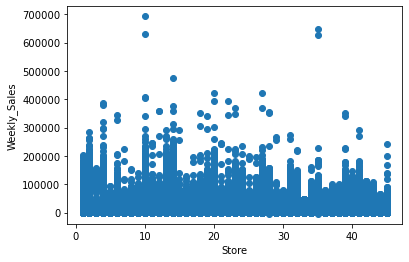

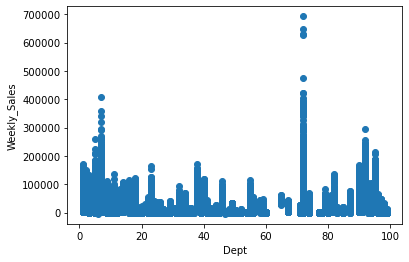

In [22]:
scatter(train_df1,'Store')
scatter(train_df1,'Dept')

<AxesSubplot:xlabel='week'>

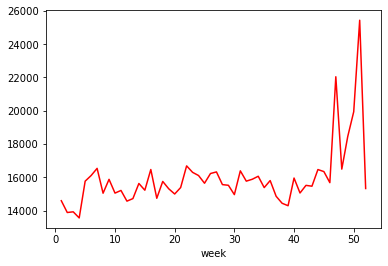

In [23]:
weekly_sales_2011 = train_df1[train_df1['year'] == 2011]["Weekly_Sales"].groupby(train_df1['week']).mean()
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values,color = 'red')

<AxesSubplot:xlabel='week'>

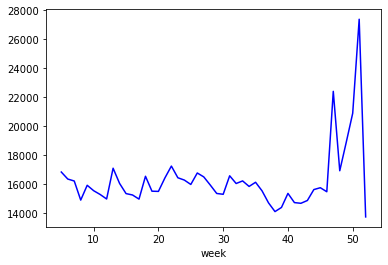

In [24]:
weekly_sales_2010 = train_df1[train_df1['year'] == 2010]["Weekly_Sales"].groupby(train_df1['week']).mean()
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values,color = 'blue')

<AxesSubplot:xlabel='week'>

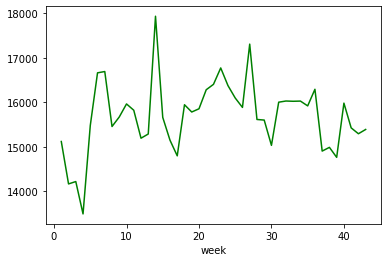

In [25]:
weekly_sales_2012 = train_df1[train_df1['year'] == 2012]["Weekly_Sales"].groupby(train_df1['week']).mean()
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values,color = 'green')

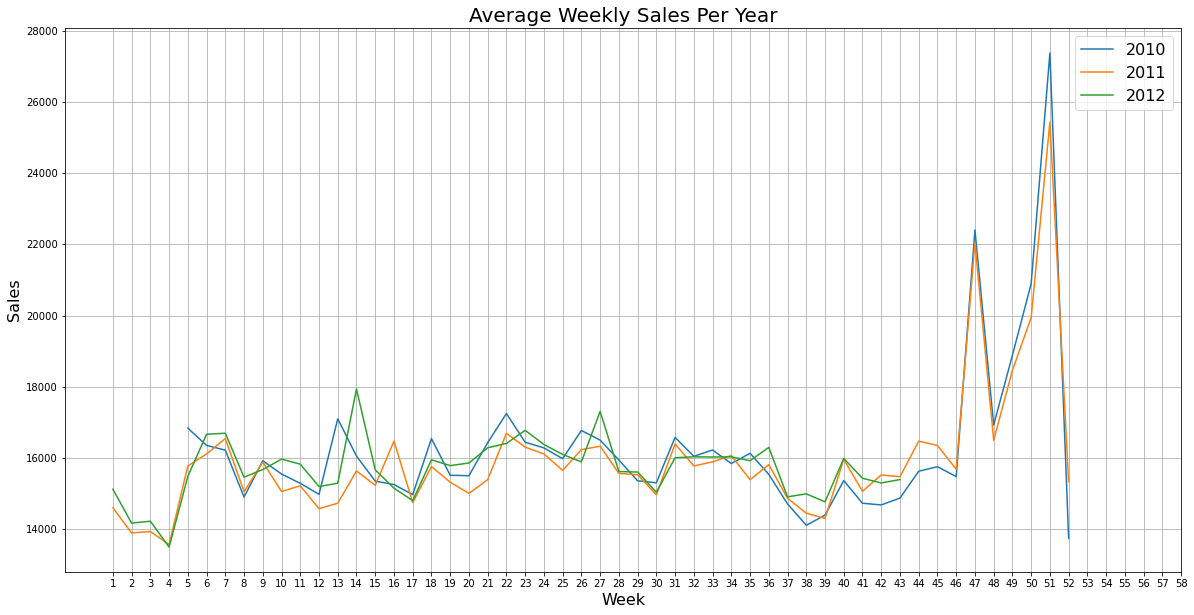

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,59,step = 1))
plt.title("Average Weekly Sales Per Year",fontsize = 20)
plt.xlabel("Week",fontsize = 16)
plt.ylabel("Sales",fontsize = 16)
plt.legend([2010,2011,2012],loc = "best",fontsize = 16)
plt.show()

#### We can see from the combined line lot that on week 51 of 2010 we have the maximum sale 

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

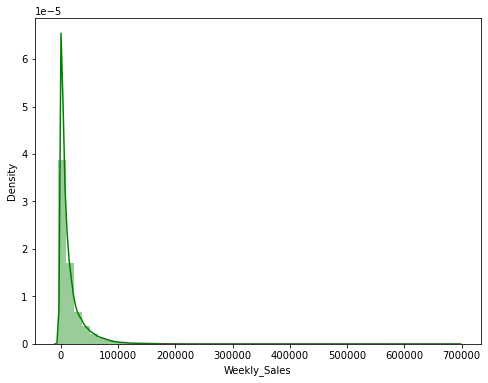

In [27]:
f,ax = plt.subplots(figsize = (8,6))
sns.distplot(train_df1["Weekly_Sales"],color='g')

In [28]:
print("Skewness : ",train_df1['Weekly_Sales'].skew())
print("Kurtosis : ",train_df1['Weekly_Sales'].kurt())

Skewness :  3.2620081854656657
Kurtosis :  21.49128990832619


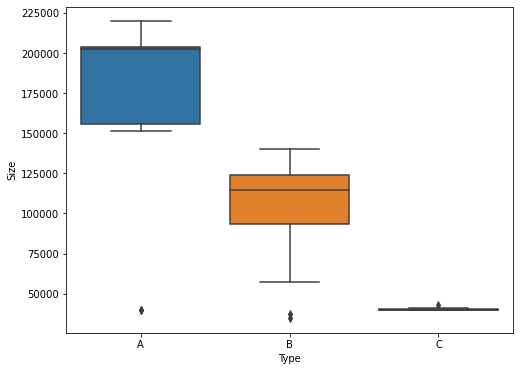

In [29]:
data = pd.concat([stores_df['Type'],stores_df['Size']],axis = 1)
f,ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = 'Type',y = 'Size',data = data)

From the above box plots we can see that Type A plots are the largest, ie has the largest size

In [30]:
weekly_sale_store = train_df['Weekly_Sales'].groupby(train_df['Store']).mean()

In [31]:
weekly_sale_store.head()

Store
1    21710.543621
2    26898.070031
3     6373.033983
4    29161.210415
5     5053.415813
Name: Weekly_Sales, dtype: float64

In [32]:
weekly_sale_store_df = pd.DataFrame(weekly_sale_store)

In [33]:
weekly_sale_store_df.sort_values("Weekly_Sales",ascending=False).style.bar(align = "left",width = 98,color = "green")

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


### We can see that Store number 20 has the highest weekly sales (20508.301592)

In [34]:
weekly_sale_store_df.sort_values("Weekly_Sales").style.bar(align = "left",width = 98,color = "yellow")

,Weekly_Sales
Store,
5,5053.415813
33,5728.414053
44,6038.929814
3,6373.033983
38,7492.478460
16,7863.224124
29,8158.810609
7,8358.766148
36,8584.412563


### We can see that Store number 5 has the least weekly sales (5053.415813)

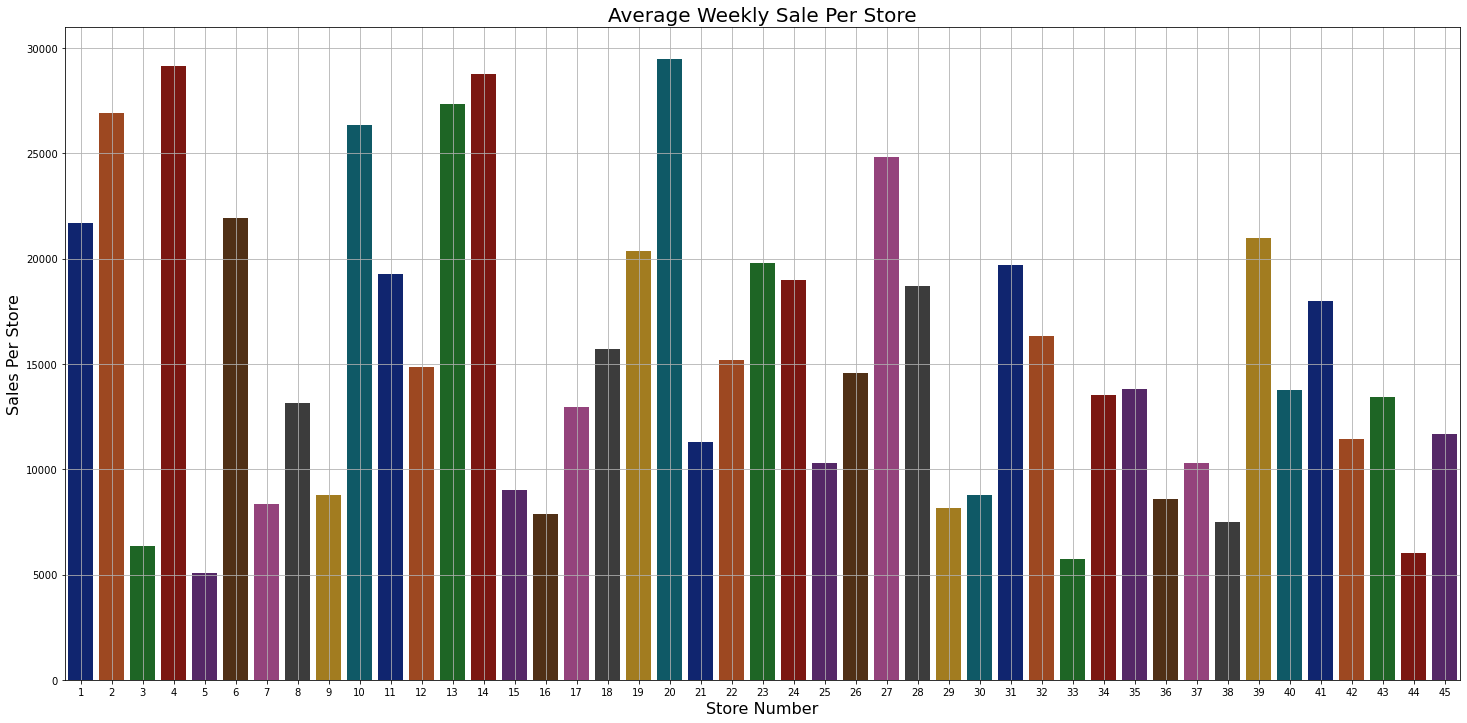

In [42]:
plt.figure(figsize=(25,12))
sns.barplot(weekly_sale_store.index,weekly_sale_store.values,palette="dark")
plt.grid()
plt.title("Average Weekly Sale Per Store",fontsize = 20)
plt.xlabel("Store Number",fontsize = 16)
plt.ylabel("Sales Per Store",fontsize = 16)
plt.show()

1)We can see that this plot is a great way to analyse how each store is performing sales wise.

2)From the plot we can see that store number 20 has the highesst mean weekly sales, followed by store 4 and then store 14.

In [43]:
weekly_sales_dept = train_df['Weekly_Sales'].groupby(train_df['Dept']).mean()

In [44]:
weekly_sales_dept.head()

Dept
1    19213.485088
2    43607.020113
3    11793.698516
4    25974.630238
5    21365.583515
Name: Weekly_Sales, dtype: float64

In [45]:
weekly_sales_dep_df = pd.DataFrame(weekly_sales_dept)

In [46]:
weekly_sales_dep_df.head()

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515


In [49]:
weekly_sales_dep_df.sort_values("Weekly_Sales",ascending=False).style.bar(align = "left",width = 98,color = "green")

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


### We can see that Department number 92 has the largest weekly sales.

In [51]:
weekly_sales_dep_df.sort_values("Weekly_Sales").style.bar(align = 'left',width = 98,color = "yellow")

,Weekly_Sales
Dept,
47,-7.682554
43,1.193333
78,7.296638
39,11.123750
51,21.931729
45,23.211586
54,108.305985
77,328.961800
60,347.370229


### We can see that department 47 has a cumulative negative value for weekly sales followed by department 43 which has a very low weekly sale of 1.193333

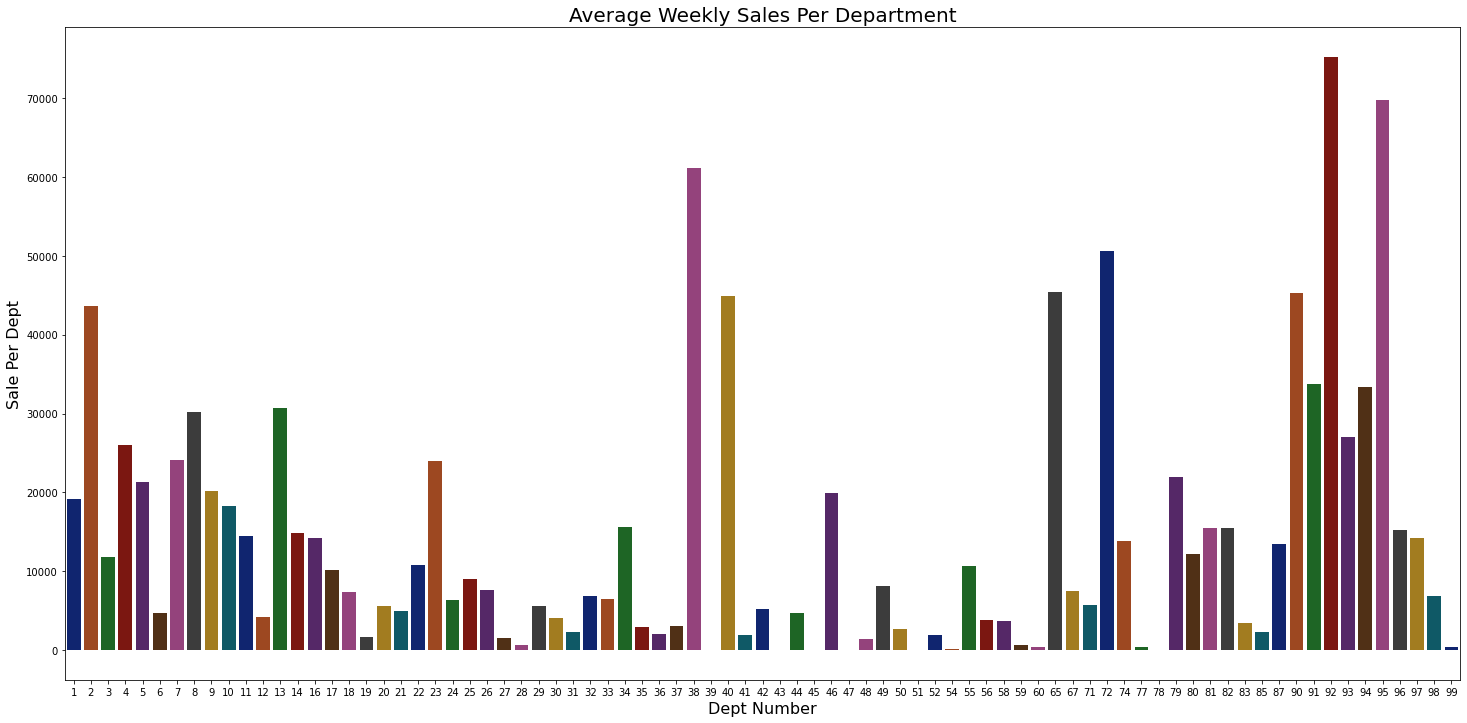

In [61]:
plt.figure(figsize = (25,12))
sns.barplot(weekly_sales_dept.index,weekly_sales_dept.values,palette="dark")
plt.title("Average Weekly Sales Per Department",fontsize = 20)
plt.xlabel("Dept Number",fontsize = 16)
plt.ylabel("Sale Per Dept",fontsize = 16)
plt.show()

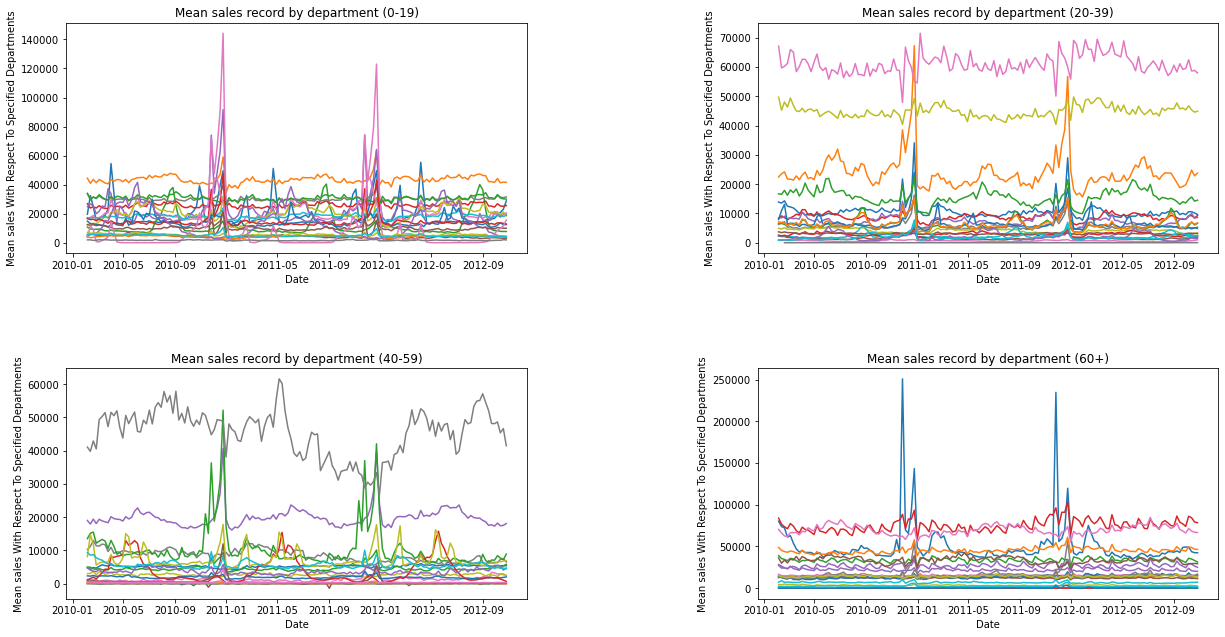

In [63]:
#Creating a data frame grouped by grouping the train_df on department and date.
grouped=train_df.groupby(['Dept','Date']).mean().reset_index()

#Filtering out Department, Date, Weekly sales from the new data frame grouped.
data=grouped[['Dept','Date','Weekly_Sales']]

#Finding out unique values in the department column.
dept=train_df['Dept'].unique()
#Sort the unique values in the column
dept.sort()
#Divide the departments into 4 batches
dept_1=dept[0:20]
dept_2=dept[20:40]
dept_3=dept[40:60]
dept_4=dept[60:]

#Create subplots with 2 rows and 2 columns and adjusting the spacing between the subplots.
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


#For each batch containg departments and for each department in each batch plot the weekly sales in accordance with date.
for i in dept_1 :
    data_1=data[data['Dept']==i]
    ax[0,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')

for i in dept_2 :
    data_1=data[data['Dept']==i]
    ax[0,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')
    
for i in dept_3 :
    data_1=data[data['Dept']==i]
    ax[1,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')    

for i in dept_4 :
    data_1=data[data['Dept']==i]
    ax[1,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')        
    
    
#Give each subplot a suitable title    
ax[0,0].set_title('Mean sales record by department (0-19)')
ax[0,1].set_title('Mean sales record by department (20-39)')
ax[1,0].set_title('Mean sales record by department (40-59)')
ax[1,1].set_title('Mean sales record by department (60+)')

#Give each Subplot y and x labels
ax[0,0].set_ylabel('Mean sales With Respect To Specified Departments')
ax[0,0].set_xlabel('Date')
ax[0,1].set_ylabel('Mean sales With Respect To Specified Departments')
ax[0,1].set_xlabel('Date')
ax[1,0].set_ylabel('Mean sales With Respect To Specified Departments')
ax[1,0].set_xlabel('Date')
ax[1,1].set_ylabel('Mean sales With Respect To Specified Departments')
ax[1,1].set_xlabel('Date')


plt.show()

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

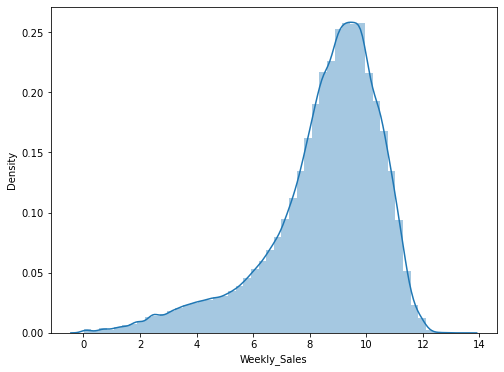

In [66]:
train_over_zero_sales = train_df[train_df['Weekly_Sales'] >0]
train_below_zero_sales = train_df[train_df['Weekly_Sales'] <0]
sales_over_zero_sales = np.log1p(train_over_zero_sales['Weekly_Sales'])
f,ax = plt.subplots(figsize = (8,6))
sns.distplot(sales_over_zero_sales)

<AxesSubplot:>

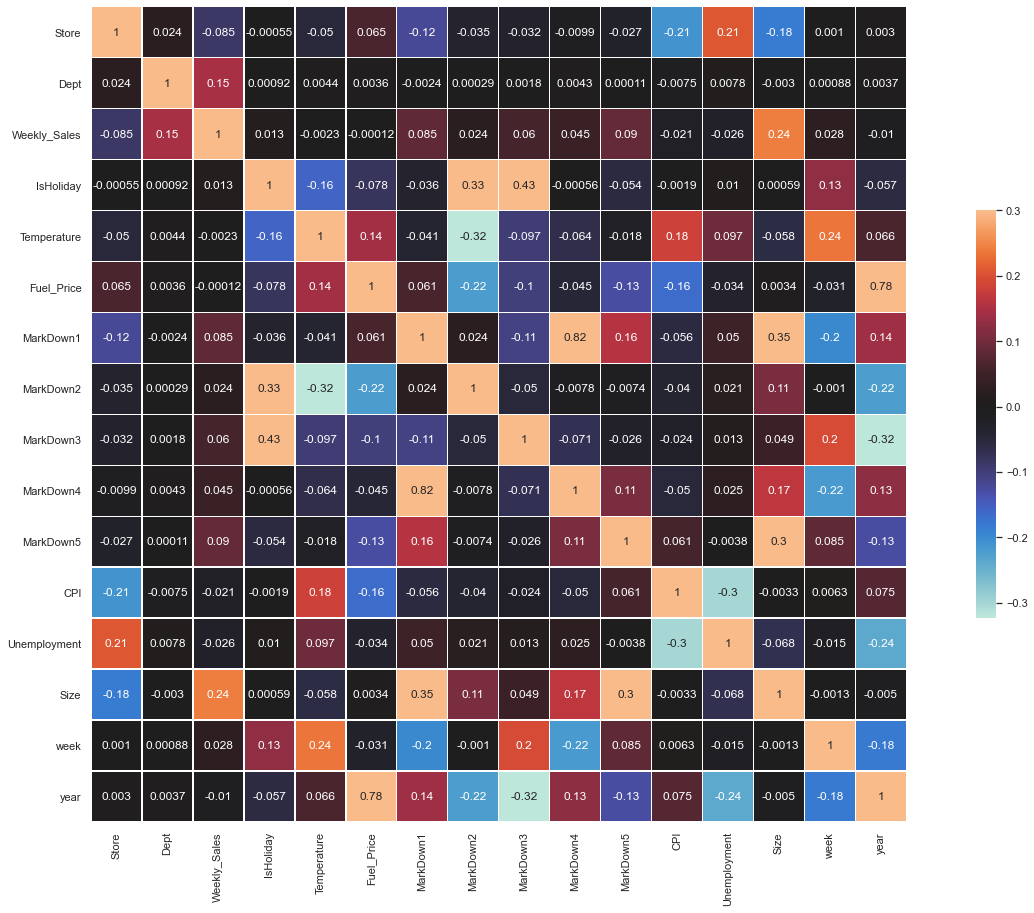

In [67]:
sns.set(style = "white")
a,fx = plt.subplots(figsize = (25,15))
sns.heatmap(train_df1.corr(), cmap = 'icefire', vmax = 0.3, center = 0, square = True, linewidth= 0.5, cbar_kws = {'shrink': 0.5}, annot = True)

We can see that there are various column that have very week correlation and thus its always better to drop these columns before modelling since that columns dosent contribute much to the process.

-------------------------------------------------------------------------------------------------------------------------------

Also,some columns are strongly correlated . One of them must be dropped else they would carry similar information to the model.

# --------------------------------------------------------------------------------------------------------